In [30]:
import pandas as pd
import numpy as np

In [31]:
data = pd.read_csv("faang_stock_prices.csv")
data

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14959,2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
14960,2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
14961,2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010
14962,2026-01-22,MSFT,447.619995,452.839996,444.700012,451.140015,25349400,456.619999,473.541905,462.516201,471.646111,28.776809,-9.129910,-6.416445,500.741510,445.204489,0.015829,0.014832,465.950012


In [32]:
# finding out if the date column is in the datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

In [33]:
# converting the date column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             14964 non-null  datetime64[ns]
 1   Ticker           14964 non-null  object        
 2   Open             14964 non-null  float64       
 3   High             14964 non-null  float64       
 4   Low              14964 non-null  float64       
 5   Close            14964 non-null  float64       
 6   Volume           14964 non-null  int64         
 7   SMA_7            14964 non-null  float64       
 8   SMA_21           14964 non-null  float64       
 9   EMA_12           14964 non-null  float64       
 10  EMA_26           14964 non-null  float64       
 11  RSI_14           14964 non-null  float64       
 12  MACD             14964 non-null  float64       
 13  MACD_Signal      14964 non-null  float64       
 14  Bollinger_Upper  14964 non-null  float

In [35]:
# Setting the Date column as the index
data.set_index('Date',inplace=True)

In [36]:
data

,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,
2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010


In [37]:
data.isnull().sum()

Ticker             0
Open               0
High               0
Low                0
Close              0
Volume             0
SMA_7              0
SMA_21             0
EMA_12             0
EMA_26             0
RSI_14             0
MACD               0
MACD_Signal        0
Bollinger_Upper    0
Bollinger_Lower    0
Daily_Return       0
Volatility_7d      0
Next_Day_Close     0
dtype: int64

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
cont_data = data.select_dtypes(exclude='object')

In [44]:
def detect_outliers(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = len(outliers)

    return outlier_summary

detect_outliers(cont_data, cont_data.columns)

{'Open': 0,
 'High': 0,
 'Low': 0,
 'Close': 0,
 'Volume': 0,
 'SMA_7': 0,
 'SMA_21': 0,
 'EMA_12': 0,
 'EMA_26': 0,
 'RSI_14': 0,
 'MACD': 0,
 'MACD_Signal': 0,
 'Bollinger_Upper': 0,
 'Bollinger_Lower': 0,
 'Daily_Return': 0,
 'Volatility_7d': 0,
 'Next_Day_Close': 0}

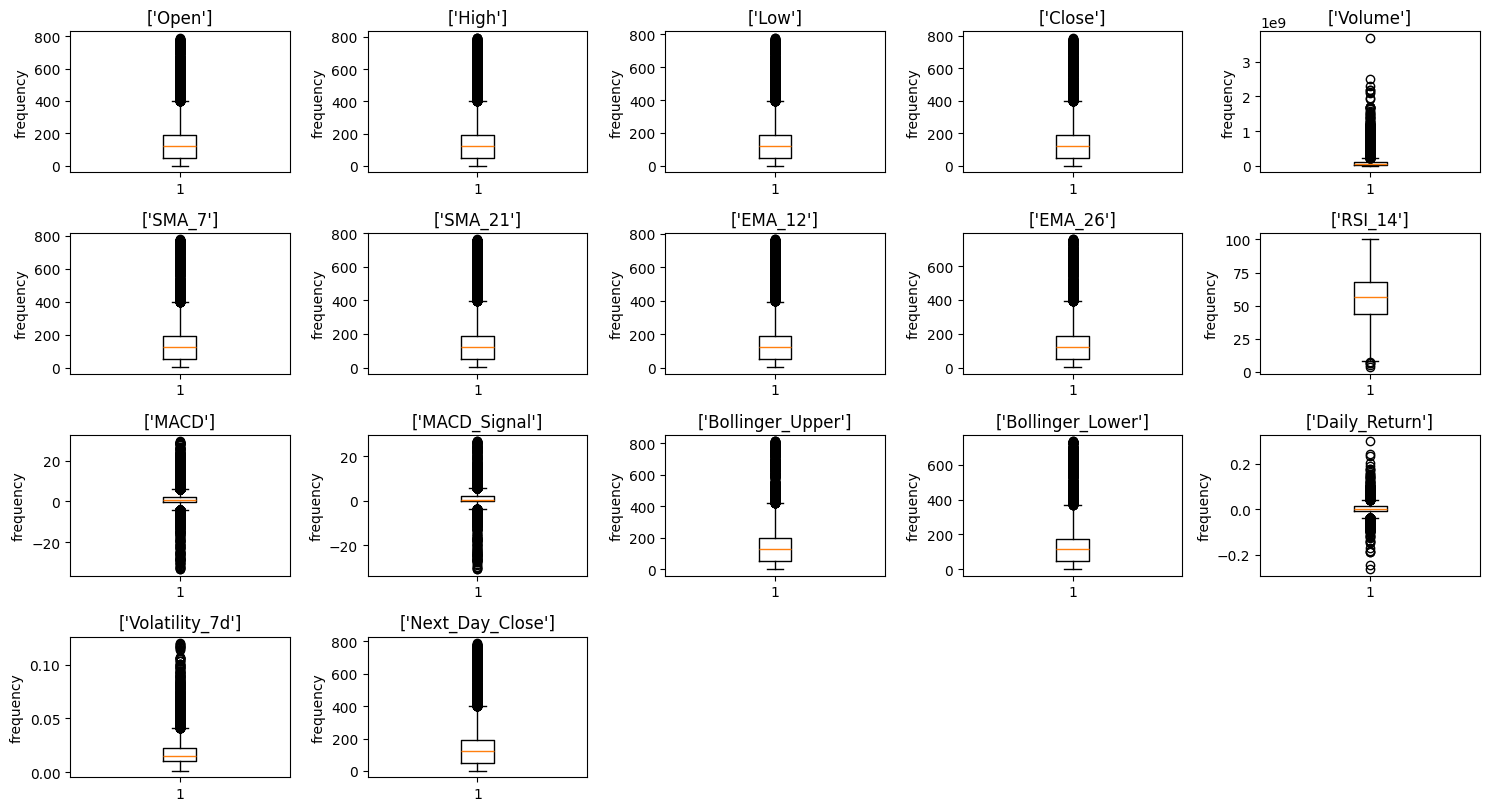

In [39]:


plt.figure(figsize=(15,10))
for i, col in enumerate (cont_data.columns):
    plt.subplot(5,5,i+1)
    plt.boxplot(data[col])
    plt.title([col])
    plt.ylabel("frequency")
plt.tight_layout()
plt.show()

In [42]:
def remove_outliers(column):
    for column in column:
        lower_quantile=cont_data[column].quantile(.25)
        upper_quantile=cont_data[column].quantile(.75)

        IQR = upper_quantile - lower_quantile

        upper_boundary=upper_quantile + 1.5 * IQR
        lower_boundary=lower_quantile - 1.5 * IQR

        cont_data[column]=np.where(cont_data[column]>upper_boundary,upper_boundary,cont_data[column])
        cont_data[column]=np.where(cont_data[column]<lower_boundary,lower_boundary,cont_data[column])

remove_outliers(cont_data.columns)

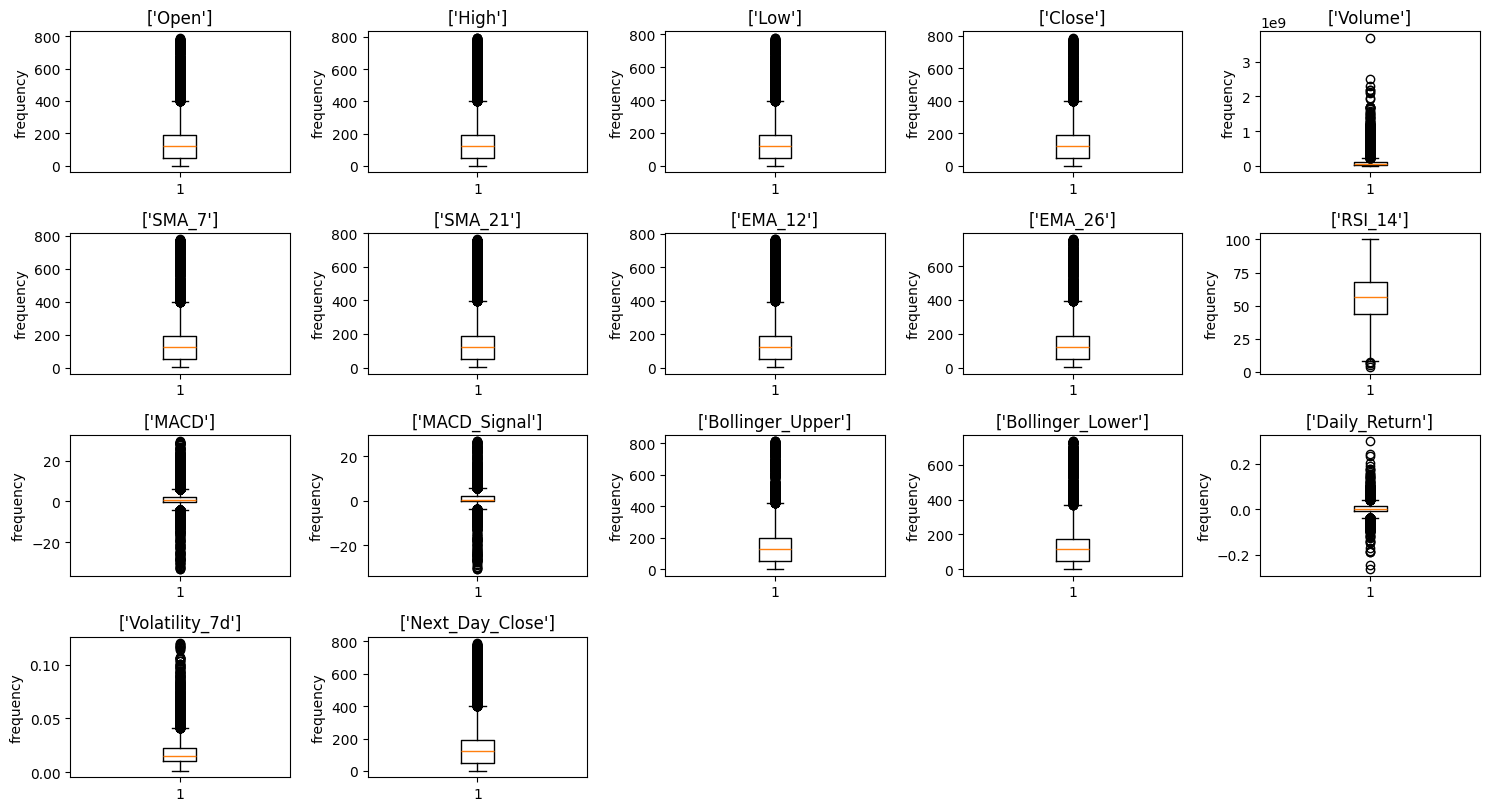

In [43]:
plt.figure(figsize=(15,10))
for i, col in enumerate (cont_data.columns):
    plt.subplot(5,5,i+1)
    plt.boxplot(data[col])
    plt.title([col])
    plt.ylabel("frequency")
plt.tight_layout()
plt.show()

# Resampling

In [46]:
data_weekly = cont_data.resample('W').mean()

In [47]:
data_weekly

,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,
2016-02-28,39.635845,40.016704,39.007090,39.650855,9.177616e+07,39.291495,39.249833,39.146358,39.013817,53.950969,0.132541,0.032079,42.592193,35.944905,-0.000481,0.019908,39.717986
2016-03-06,40.399992,40.790830,40.003362,40.454457,9.353847e+07,39.973119,39.237238,39.709768,39.357488,73.229171,0.352281,0.190325,41.736684,36.547220,0.004958,0.016939,40.469238
2016-03-13,40.049726,40.411731,39.505397,40.053912,9.063386e+07,40.231628,39.375878,39.949727,39.611066,60.017206,0.338660,0.307080,41.561745,37.366396,0.001346,0.015944,40.338954
2016-03-20,41.211169,41.669560,40.913288,41.360032,9.320059e+07,40.664158,40.087036,40.549280,40.042932,65.826412,0.506349,0.395441,41.805248,38.502338,0.003510,0.011771,41.459526
2016-03-27,41.418788,41.879743,41.260160,41.694292,8.437222e+07,41.464595,40.595039,41.087690,40.486592,60.914752,0.601098,0.513718,42.365176,38.915794,0.004139,0.010747,41.788383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-28,299.600441,302.430993,296.893669,300.015664,3.582987e+07,296.799080,298.048604,297.200174,296.030301,48.924695,0.916532,0.667570,313.467616,283.590281,0.004370,0.013833,300.742418
2026-01-04,300.502526,303.584742,297.388251,299.953998,3.772212e+07,299.636045,298.085408,298.294528,296.781442,48.014605,1.277287,1.059964,313.271921,283.589121,-0.003501,0.008691,299.957001
2026-01-11,301.190524,304.933492,297.577503,301.152164,5.330230e+07,300.166509,297.891543,298.965071,297.400903,58.031914,1.102584,1.067879,314.166780,282.350871,0.002929,0.010825,301.882750


# Feature scaling

In [50]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:

scaler = MinMaxScaler(feature_range=(0,1))

NameError: name 'scikit' is not defined